In [44]:
import pandas as pd
import keras
import pydot

## 1 Defining a Keras Model

### 1.1 Single Input

The first step in creating a neural network model is to define the Input layer. This layer takes in raw data, usually in the form of numpy arrays. The shape of the Input layer defines how many variables your neural network will use. For example, if the input data has 10 columns, you define an Input layer with a shape of (10,).

In [21]:
input_tensor = keras.Input(shape=(1,0))
print(input_tensor)

Tensor("input_4:0", shape=(?, 1, 0), dtype=float32)


### 1.2 Single Output

Once you have an Input layer, the next step is to add a Dense layer.

Dense layers learn a weight matrix, where the first dimension of the matrix is the dimension of the input data, and the second dimension is the dimension of the output data. Recall that your Input layer has a shape of 1. In this case, your output layer will also have a shape of 1. This means that the Dense layer will learn a 1x1 weight matrix.

In [22]:
output_layer = keras.layers.Dense(1)
print(output_layer)

#### Note that layers are functions and not tensors. Layers are used to construct a deep learning model and tensors are used to define the dataflow trought the model.

### 1.3 Connecting inputs to outputs

Output layers are simply Dense layers! Output layers are used to reduce the dimension of the inputs to the dimension of the outputs. You'll learn more about output dimensions in chapter 4, but for now, you'll always use a single output in your neural networks, which is equivalent to Dense(1) or a dense layer with a single unit.

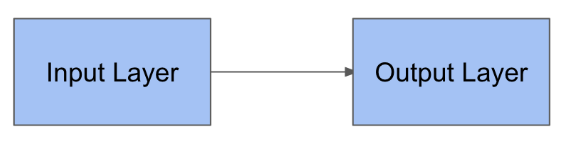

In [31]:
from keras.layers import Input, Dense
input_tensor = Input(shape=(1,))
output_layer = Dense(1)
output_tensor = output_layer(input_tensor)
print(output_tensor)

Tensor("dense_10/BiasAdd:0", shape=(?, 1), dtype=float32)


#### The cell above is equivalent to:

In [ ]:
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)

#### The final output of the model is also a Tensor.

### 1.4 Creating a Model

Once you've defined an input layer and an output layer, you can build a Keras model. The model object is how you tell Keras where the model starts and stops: where data comes in and where predictions come out.

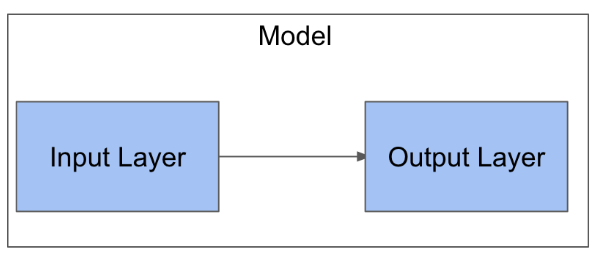

In [33]:
from keras.models import Model
model = Model(input_tensor,output_tensor)

### 1.5 Compile a Model

The final step in creating a model is compiling it. Now that you've created a model, you have to compile it before you can fit it to data. This finalizes your model, freezes all its settings, and prepares it to meet some data!

During compilation, you specify the optimizer to use for fitting the model to the data, and a loss function. 'adam' is a good default optimizer to use, and will generally work well. Loss function depends on the problem at hand. Mean squared error is a common loss function and will optimize for predicting the mean, as is done in least squares regression.

Mean absolute error optimizes for the median and is used in quantile regression. For this dataset, 'mean_absolute_error' works pretty well, so use it as your loss function.

In [37]:
model.compile(optimizer='adam', loss='mae')

### 1.6 Visualize a Model

Onde the model is compiled it's possible to take look a the. To do this we can look at the model summary, as well as its plot.

The summary will tell you the names of the layers, as well as how many units they have and how many parameters are in the model.

The plot will show how the layers connect to each other.

In [47]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Summarize the model
model.summary()

# Plot the model
plot_model(model, to_file='model.png')

# Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 1)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

## Importing csv with data

In [40]:
games_season = pd.read_csv('datasets/Big_Dance.csv')